In [1]:
!pip install spacy seaborn

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import numpy as np

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# Get text and labels
texts = newsgroups.data
labels = newsgroups.target

# Split the dataset into training and testing
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_texts = tokenizer.texts_to_sequences(train_texts)
test_texts = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to make them equal length
max_length = 200
train_texts = pad_sequences(train_texts, maxlen=max_length, padding='post')
test_texts = pad_sequences(test_texts, maxlen=max_length, padding='post')

# Convert labels to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


In [3]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential

def build_lstm_model(vocab_size, embed_dim, max_length):
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_length))

    # LSTM layer
    model.add(LSTM(128, return_sequences=True))

    # Global Average Pooling to reduce the sequence output to a fixed-size vector
    model.add(GlobalAveragePooling1D())

    # Dropout for regularization
    model.add(Dropout(0.5))

    # Fully connected output layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(20, activation='softmax'))  # 20 classes for 20 Newsgroups dataset

    return model

# Hyperparameters
vocab_size = 10000
embed_dim = 64

# Build the model
model = build_lstm_model(vocab_size, embed_dim, max_length)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
history = model.fit(train_texts, train_labels, validation_data=(test_texts, test_labels), epochs=10, batch_size=32)


Epoch 1/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7723 - loss: 0.6674 - val_accuracy: 0.7467 - val_loss: 0.8479
Epoch 2/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8412 - loss: 0.4720 - val_accuracy: 0.7759 - val_loss: 0.7774
Epoch 3/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8846 - loss: 0.3591 - val_accuracy: 0.7838 - val_loss: 0.7850
Epoch 4/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9089 - loss: 0.2848 - val_accuracy: 0.7902 - val_loss: 0.8357
Epoch 5/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9328 - loss: 0.2201 - val_accuracy: 0.8008 - val_loss: 0.7818
Epoch 6/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9444 - loss: 0.1851 - val_accuracy: 0.8016 - val_loss: 0.8369
Epoch 7/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9580 - loss: 0.1473 - val_accuracy: 0.7928 - val_loss: 0.9234
Epoch 8/10
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9648 - loss: 0.1260 - va

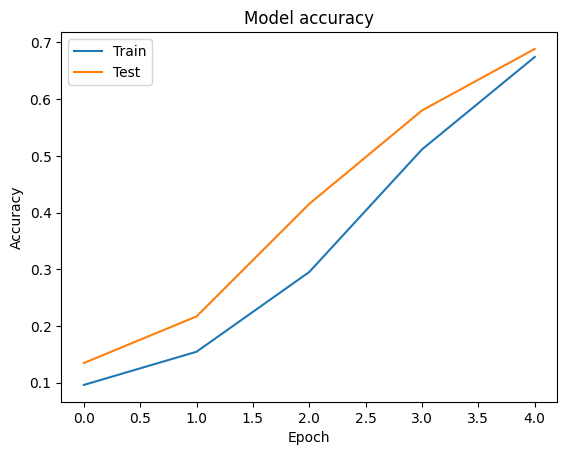

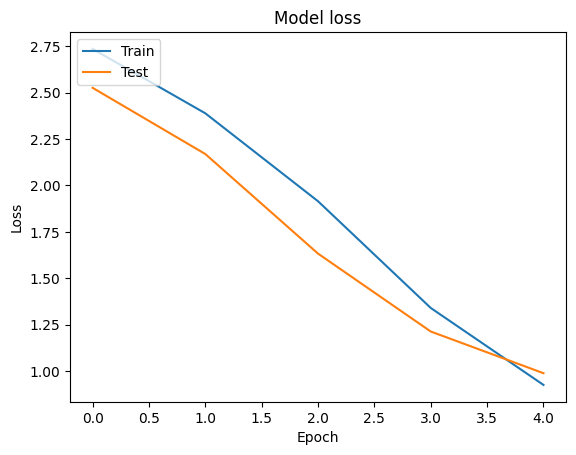

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [6]:
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6747 - loss: 1.0688
Test Accuracy: 68.86%


Embeddings shape: (1, 20, 64)


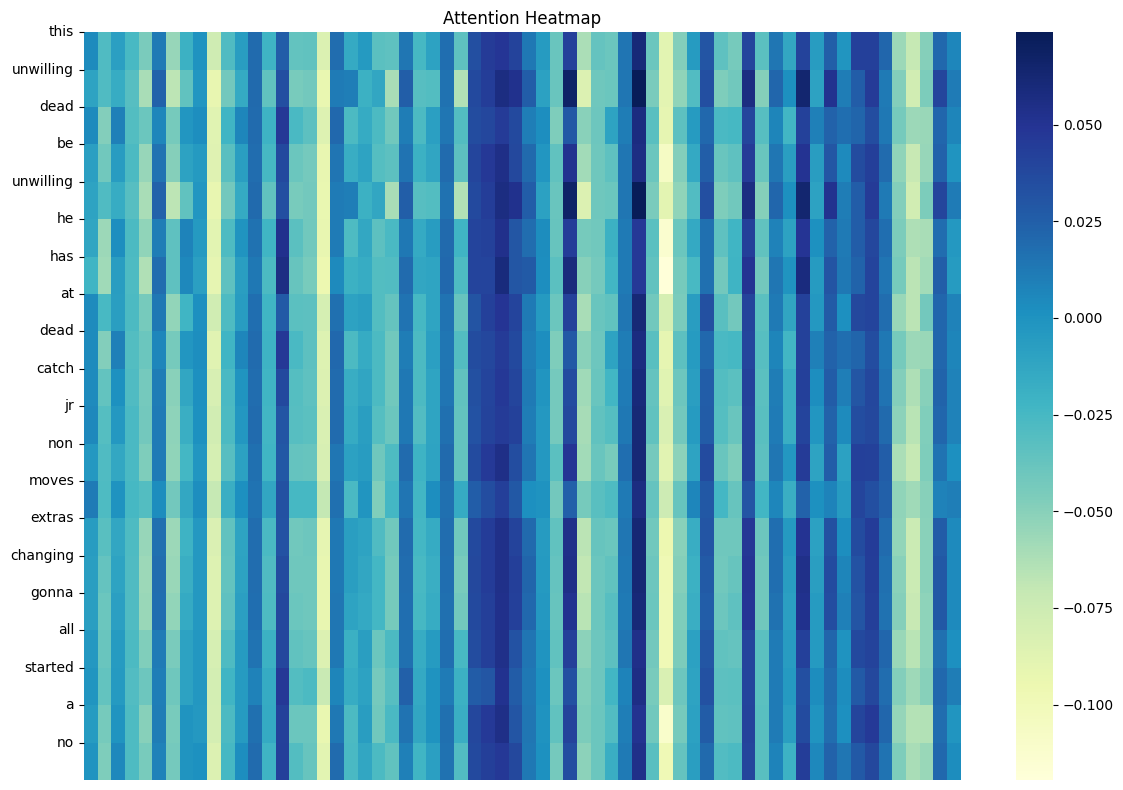

In [25]:
def visualize_attention_with_words(input_text, model, attention_layer):
    # Decode and trim input
    decoded_words = decode_sequence(input_text)
    trimmed_input, trimmed_words = trim_padding(input_text.tolist(), decoded_words)

    # Limit to a subset for readability
    max_tokens = 20
    trimmed_input, trimmed_words = trimmed_input[:max_tokens], trimmed_words[:max_tokens]

    # Preprocess the input
    input_tensor = tf.constant(trimmed_input)
    input_tensor = tf.expand_dims(input_tensor, axis=0)  # Shape (1, sequence_length)

    # Pass the input through the embedding layer to get the embeddings
    embeddings = model.layers[0](input_tensor)  # Embedding layer (usually the first layer)
    print(f"Embeddings shape: {embeddings.shape}")  # Debugging step to confirm shape

    # Ensure the embeddings have the correct shape (batch_size, sequence_length, embedding_dim)
    assert embeddings.ndim == 3, f"Expected 3D tensor, got {embeddings.shape}"

    # For Attention layer, pass embeddings to the attention layer
    attention_output = attention_layer([embeddings, embeddings])  # Query and value are the same for self-attention

    # Get attention weights (Attention layer doesn't provide them directly, so we use the output here)
    attention_weights = attention_output[0].numpy().squeeze()  # Get the output (weights)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))  # Increase figure size to avoid label overlap
    sns.heatmap(attention_weights, cmap="YlGnBu", xticklabels=trimmed_words, yticklabels=trimmed_words, annot=False)

    # Remove x-axis labels by setting them to an empty list
    plt.title("Attention Heatmap")
    plt.xticks([])  # Removes x-axis labels
    plt.yticks(ticks=range(len(trimmed_words)), labels=trimmed_words, rotation=0)  # Optional: Adjust y-axis labels if needed

    plt.tight_layout()  # Ensure everything fits without overlap
    plt.show()

# Call the function to visualize the second heatmap
test_input = test_texts[1]  # Use the second review for the heatmap
visualize_attention_with_words(test_input, model, Attention())
